In [1]:
import rasterio
import os
import sys

import matplotlib.pyplot as plt

sys.path.append("../starfm")
from starfm import starfm


In [2]:
with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "ndvi", "chip_fine_ndvi_9.tif")) as src:
    fine_t0 = src.read(1)
    meta = src.meta

with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "ndvi", "chip_coarse_ndvi_9.tif")) as src:
    coarse_t0 = src.read(1)

with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "ndvi", "chip_coarse_pred_ndvi_1.tif")) as src:
    coarse_t1 = src.read(1)

In [3]:
window_size = 51
window_size_half = window_size // 2
mask_val = -9999
spatial_impact_factor = window_size
dim_rows = 128
dim_cols = 128
tmp_diff_flag = False
spectral_uncertainty = 50
temporal_uncertainty = 50
n_classes=40

In [4]:
preds = starfm(
    fine_t0,
    coarse_t0,
    coarse_t1,
    window_size,
    window_size_half,
    mask_val,
    dim_rows,
    dim_cols,
    tmp_diff_flag,
    spectral_uncertainty,
    temporal_uncertainty,
    spatial_impact_factor,
    n_classes
)


In [13]:
import numpy as np
preds = preds.astype("int16")
np.max(preds)

6350

In [6]:
fine_t0.dtype

dtype('int16')

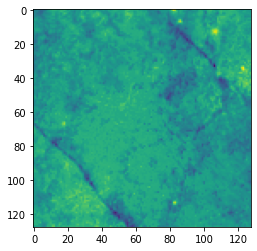

In [7]:
plt.imshow(preds)

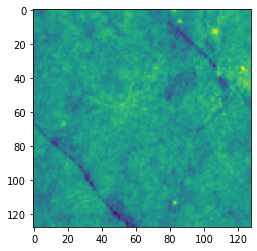

In [10]:
plt.imshow(fine_t0)

In [9]:
with rasterio.open(os.path.join(os.getcwd(), "starfm_tests", "ndvi", "starfm_synth_ndvi_1.tif")) as src:
    image_fusion_r = src.read(1)

In [10]:
image_fusion_r.dtype

dtype('int16')

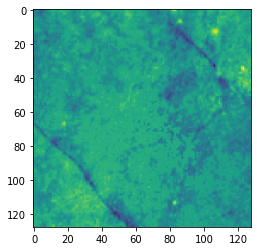

In [9]:
plt.imshow(image_fusion_r)